In [2]:
import turicreate as tc
import numpy as np
import utils
from matplotlib import pyplot as plt

In [3]:
data = tc.SFrame('Hyderabad.csv')
data

Finished parsing file /home/alexandr_user/documents/Python/Jupyter_notebooks/Hyderabad.csv

Parsing completed. Parsed 100 lines in 0.125296 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/alexandr_user/documents/Python/Jupyter_notebooks/Hyderabad.csv

Parsing completed. Parsed 2518 lines in 0.035818 secs.

Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens
6968000,1340,Nizampet,2,0,0,1,1,1
29000000,3498,Hitech City,4,0,0,1,1,1
6590000,1318,Manikonda,2,0,0,1,0,0
5739000,1295,Alwal,3,1,0,0,0,0
5679000,1145,Kukatpally,2,0,0,0,0,1
6099000,1230,Nizampet,2,0,0,0,0,0
7000000,1350,Manikonda,2,0,0,0,0,0
4198000,1400,Gachibowli,3,0,0,1,1,0
9900000,2240,Tellapur,3,0,0,1,1,0
9800000,1520,Gachibowli,2,1,0,0,0,0


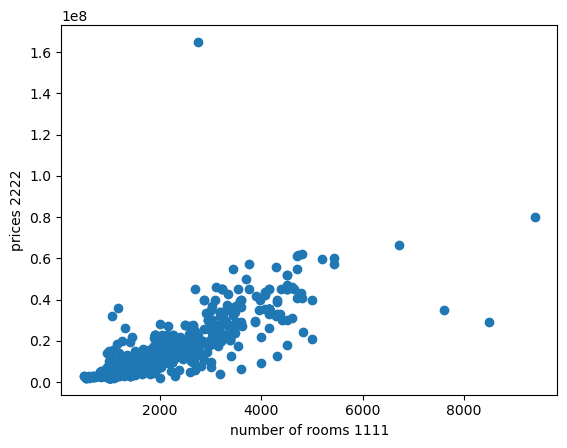

In [6]:
utils.plot_points(
    features=data['Area'],
    labels=data['Price'],
)

In [7]:
model = tc.linear_regression.create(data, target='Price')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 39

Number of unpacked features : 39

Number of coefficients    : 276

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.040055     | 140296006.740959   | 19187618.865724      | 4239466.194056                  | 4316812.788403                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [10]:
house = tc.SFrame({"Area": [1000], "No. of Bedrooms": [3]})
model.predict(house)

dtype: float
Rows: 1
[2104012.967780849]

In [11]:
simple_model = tc.linear_regression.create(data, features=["Area"],
                                          target="Price")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.000946     | 144480670.960385   | 13420675.534811      | 4973911.458819                  | 3302582.980770                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [14]:
bias, slope = simple_model.coefficients["value"]
print("slope: ", slope)
print("bias: ", bias)

slope:  9687.730641477361
bias:  -6121930.224447461


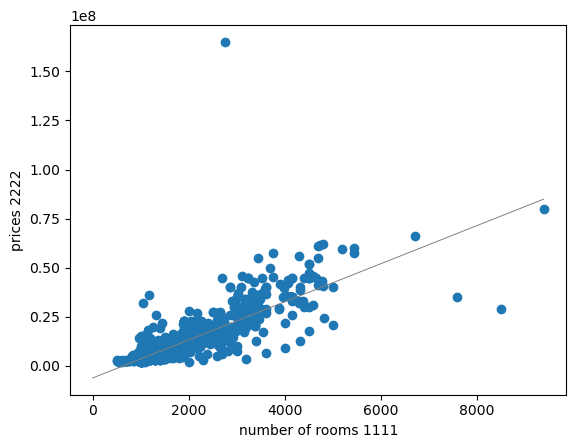

In [15]:
utils.plot_points(
    features=data['Area'],
    labels=data['Price'],
)
utils.draw_line(
    slope=slope,
    y_intercept=bias,
    starting=0,
    ending=max(data["Area"])
)